<a href="https://colab.research.google.com/github/HenriqueCCdA/Prophet/blob/main/notebook/quick_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [38]:
plt.rcParams["figure.figsize"] = (20,10)

In [39]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [40]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2905 non-null   datetime64[ns]
 1   y       2905 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB


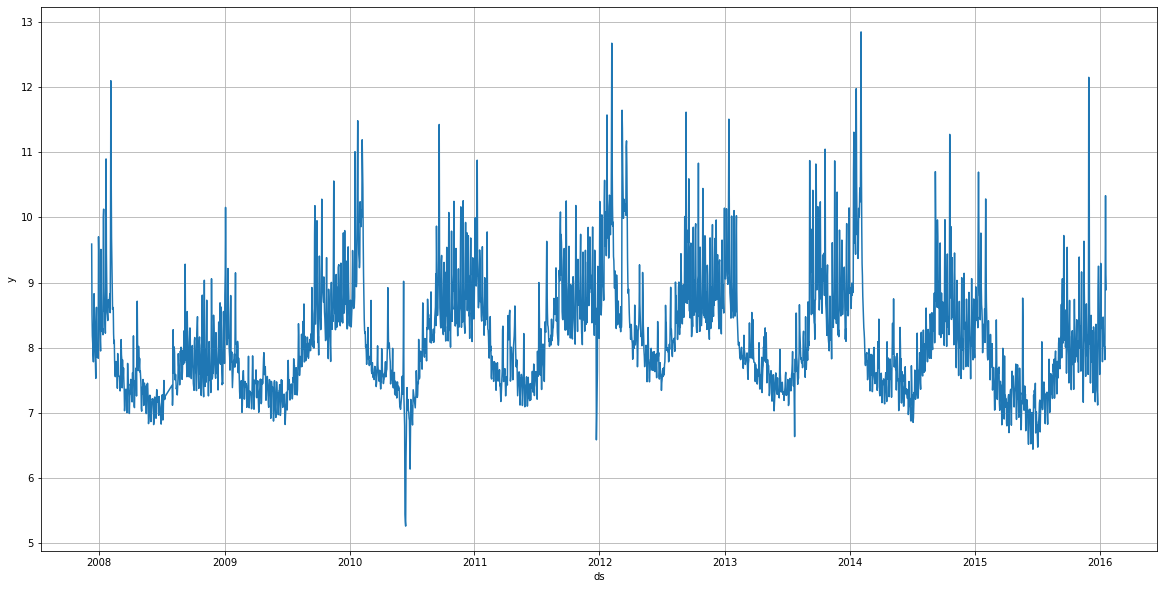

In [45]:
ax = sns.lineplot(x='ds', y = 'y', data = df)
ax.grid()
plt.show()

In [156]:
m = Prophet(weekly_seasonality=False, seasonality_mode='additive')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [157]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [158]:
forecast = m.predict(future)

In [159]:
forecast.tail()[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.179378,7.411320,9.003568
3266,2017-01-16,8.200878,7.470391,8.980396
3267,2017-01-17,8.221402,7.465092,8.985111
3268,2017-01-18,8.240736,7.469919,9.008813
3269,2017-01-19,8.258626,7.478749,9.005736


In [160]:
ultima_data = df.iloc[-1][0]
ultima_data

Timestamp('2016-01-20 00:00:00')

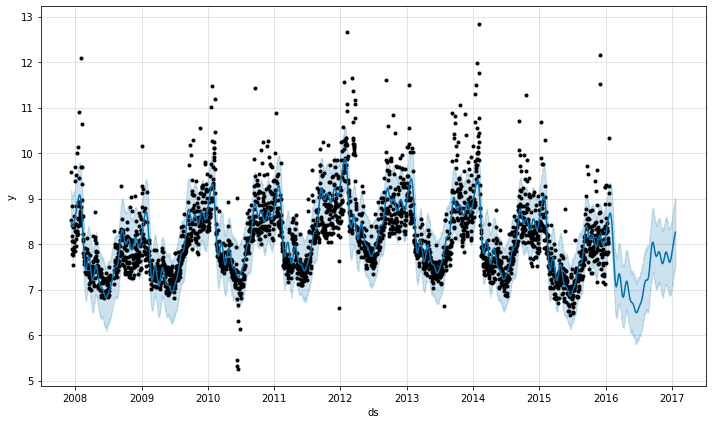

In [161]:
fig1 = m.plot(forecast)

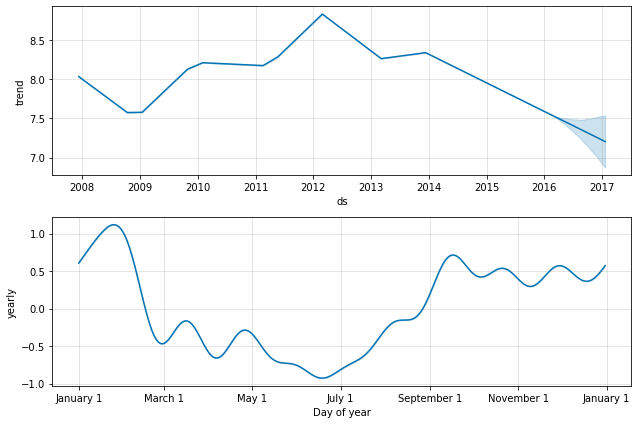

In [162]:
fig2 = m.plot_components(forecast)

# Testes

In [163]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

## Plotando direto pelo matplot os ys

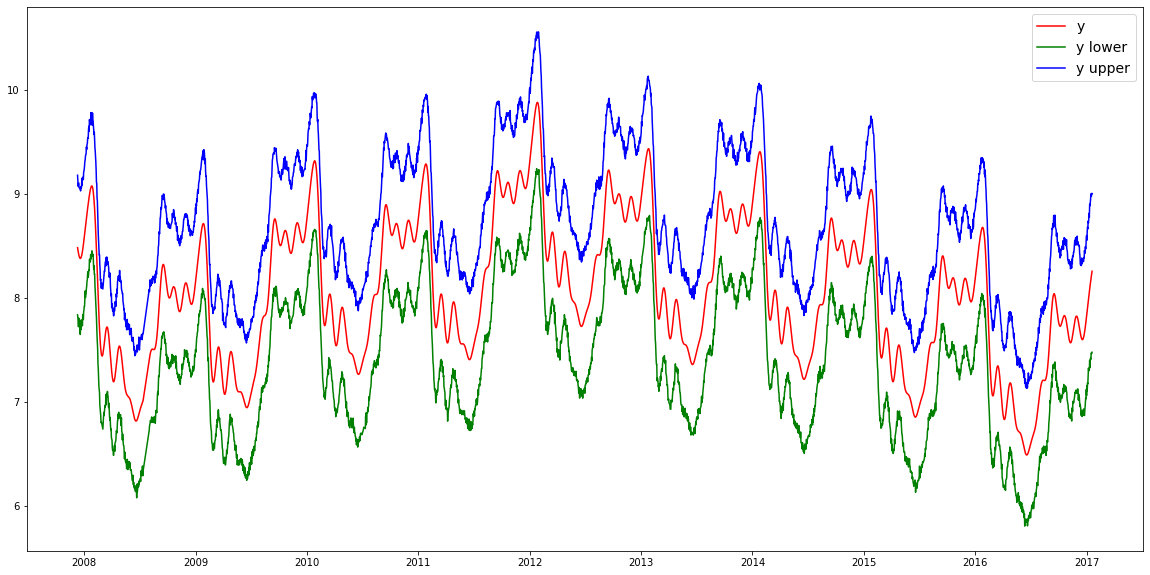

In [164]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', label = 'y')
plt.plot(forecast['ds'], forecast['yhat_lower'], color='green', label = 'y lower')
plt.plot(forecast['ds'], forecast['yhat_upper'], color='blue', label = 'y upper')

plt.legend(fontsize=14)
plt.show()

## Soma dos termos

$y(t) = g(t) + s(t) + h(t)$

$g(t)$ -> trend

$s(t)$ -> efeitos periodicos(semana e ano)

$h(t)$ -> efeitos do feriados


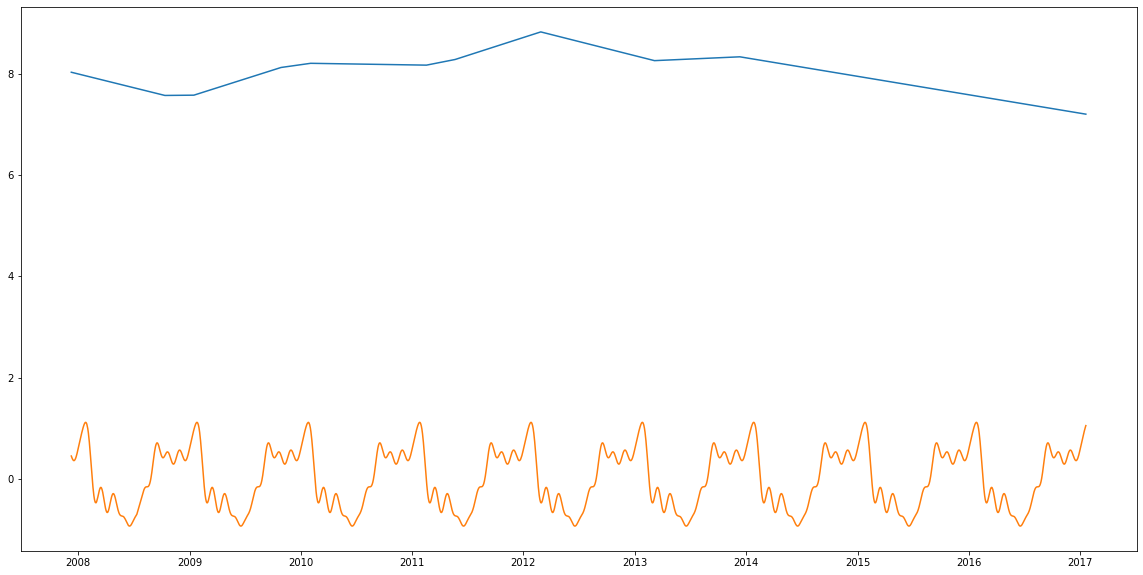

In [165]:
plt.plot(forecast['ds'], forecast['trend'])
plt.plot(forecast['ds'], forecast['yearly'])

In [166]:
def previsao(t, g, s):

  y = pd.DataFrame()

  y['ds'] = t.copy()
  y['y'] = g.copy() + s.copy()
  
  return y

In [167]:
minha_soma = previsao(forecast['ds'], forecast['trend'], forecast['yearly'])

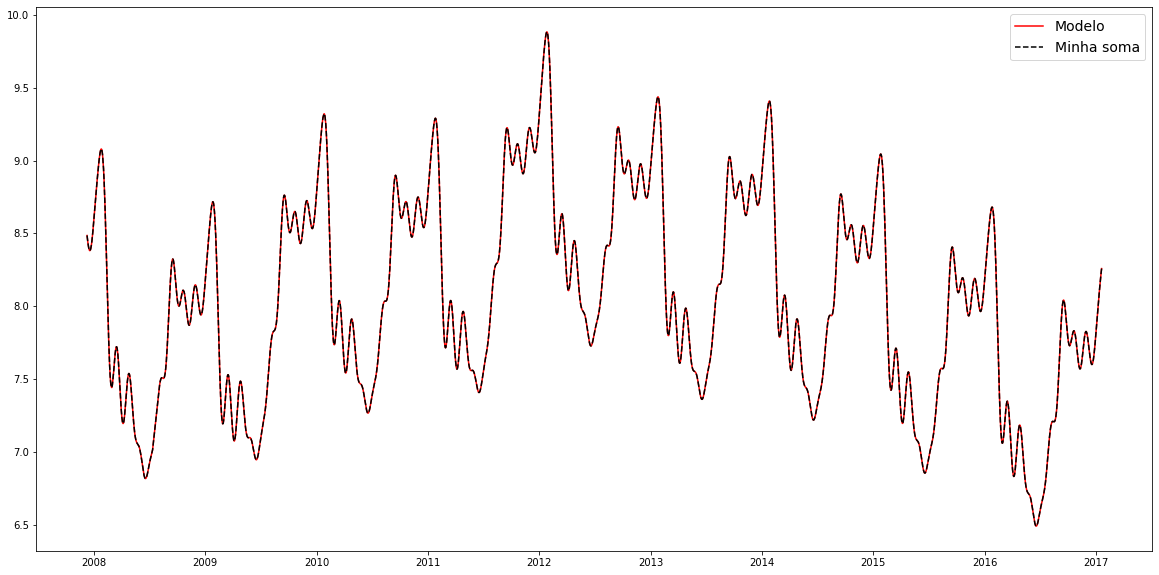

In [168]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', label = 'Modelo')
plt.plot(minha_soma['ds'], minha_soma['y'], color='black', ls='--', label = 'Minha soma')
plt.legend(fontsize=14)
plt.show()